# Basic Image Processing

http://www.scipy-lectures.org/advanced/image_processing/#opening-and-writing-to-image-files

In [1]:
import numpy as np
import scipy as sp
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Open and Display Image

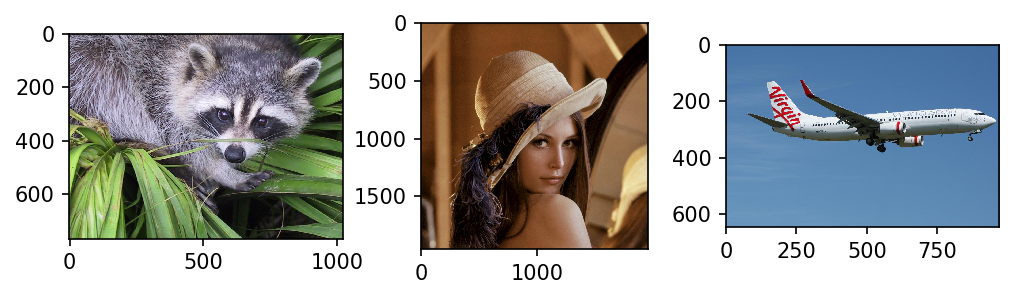

In [2]:
from scipy import ndimage
from scipy import misc

face = misc.face()

plane = plt.imread("./Images/plane.jpg")

lena = Image.open("./Images/lenna.jpg")

plt.figure(dpi=150,figsize=(8,2))
plt.subplot(1,3,1)
plt.imshow(face)

plt.subplot(1,3,2)
plt.imshow(lena)

plt.subplot(1,3,3)
plt.imshow(plane)


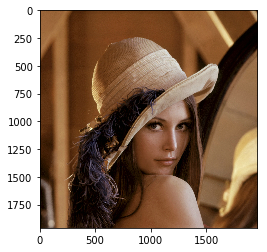

In [3]:
im = lena
plt.imshow(im)

In [4]:
imageArray = np.asarray(im)

In [5]:
imageArray.shape

(1960, 1960, 3)

In [6]:
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [7]:
face.shape

(768, 1024, 3)

In [8]:
face.dtype

dtype('uint8')

## Convert Color to Gray Scale

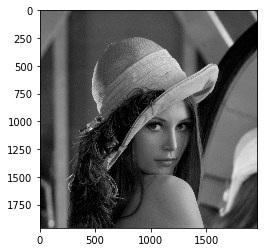

In [9]:
grayScaleImage= im.convert("L")
grayScaleArray = np.asarray(grayScaleImage)
plt.imshow(grayScaleArray,cmap='gray')

In [10]:
faceGray = Image.fromarray(face).convert("L")
faceGrayArray = np.asarray(faceGray)
faceGrayArray

array([[116, 133, 149, ..., 117, 128, 136],
       [ 86, 107, 126, ..., 116, 132, 144],
       [ 70,  91, 112, ..., 117, 133, 144],
       ...,
       [ 96, 101, 115, ..., 139, 138, 139],
       [ 92, 102, 118, ..., 139, 138, 138],
       [ 93, 104, 118, ..., 138, 137, 136]], dtype=uint8)

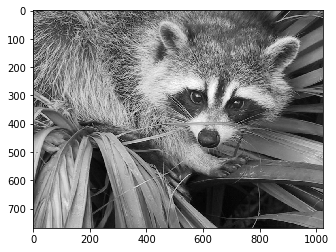

In [11]:
plt.imshow(faceGrayArray, cmap=plt.cm.gray)        

### Histogram

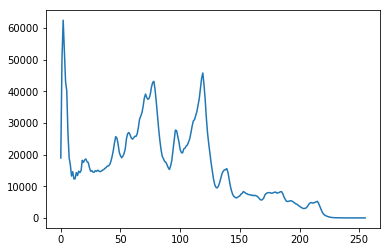

In [12]:
plt.plot(grayScaleImage.histogram())

In [13]:
grayScaleArray

array([[114, 114, 114, ...,  35,  33,  35],
       [114, 114, 115, ...,  36,  32,  34],
       [114, 115, 115, ...,  37,  35,  38],
       ...,
       [ 35,  34,  34, ...,  84,  82,  81],
       [ 37,  35,  34, ...,  84,  83,  83],
       [ 41,  37,  35, ...,  82,  84,  86]], dtype=uint8)

## Image Geometric Tranformations

### Roatate an Image

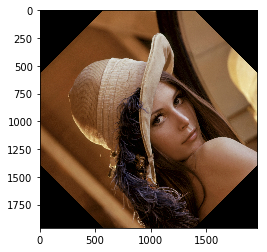

In [14]:
im_rotate = im.rotate(45)
plt.imshow(im_rotate)

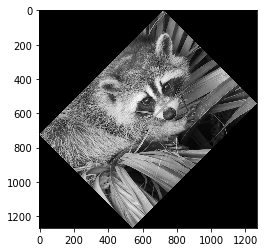

In [31]:
x = ndimage.rotate(faceGrayArray,45)
plt.imshow(x, cmap=plt.cm.gray)

### Resize Image

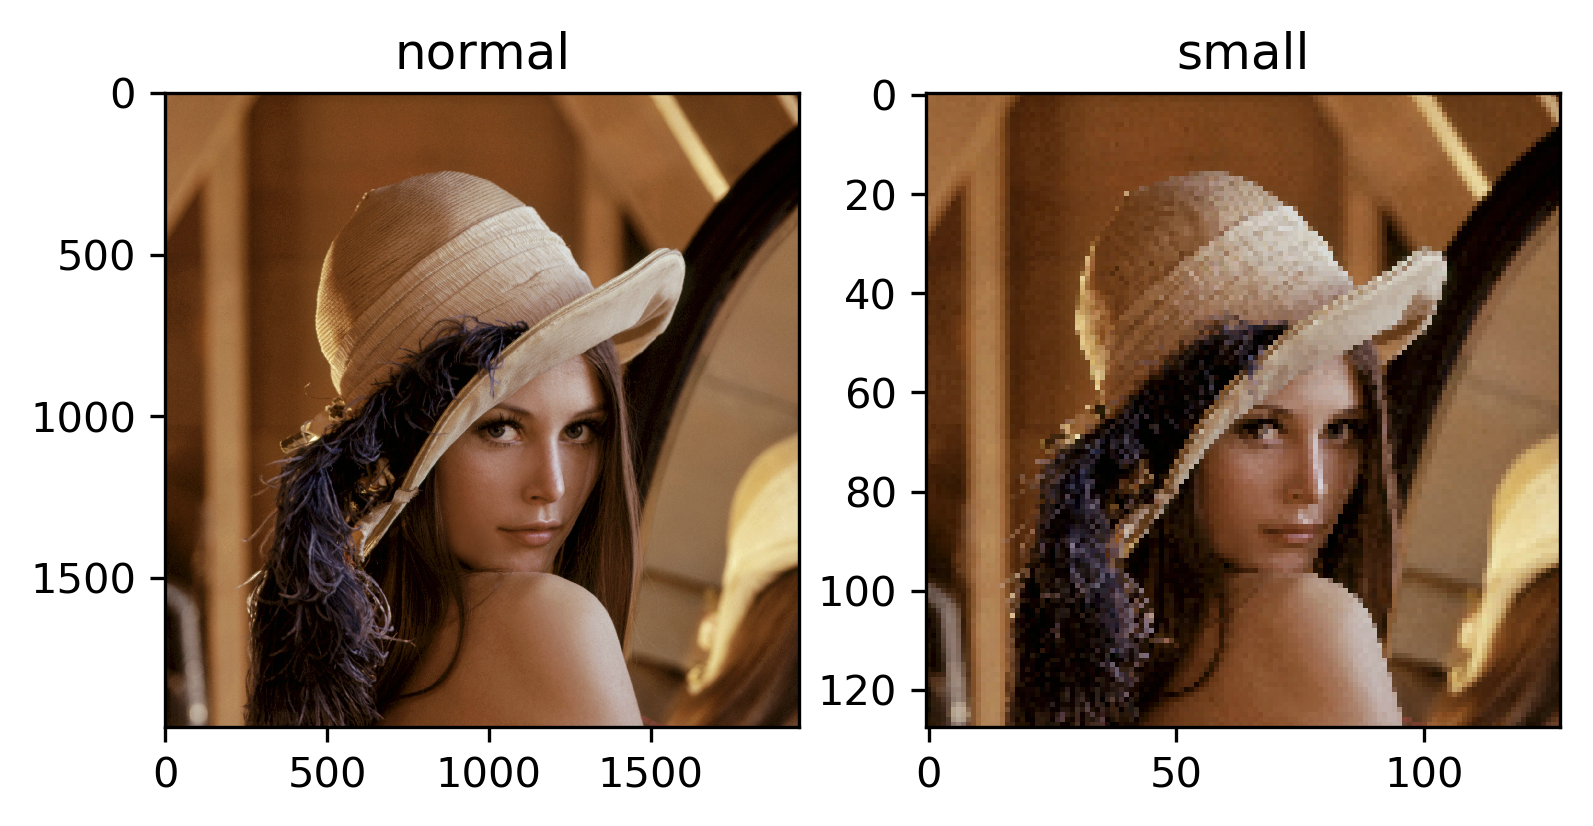

In [45]:
im_small = lena.resize((128,128))

plt.figure(dpi=300)

plt.subplot(1,2,1)
plt.title("normal")
plt.imshow(lena)

plt.subplot(1,2,2)
plt.title("small")
plt.imshow(im_small)

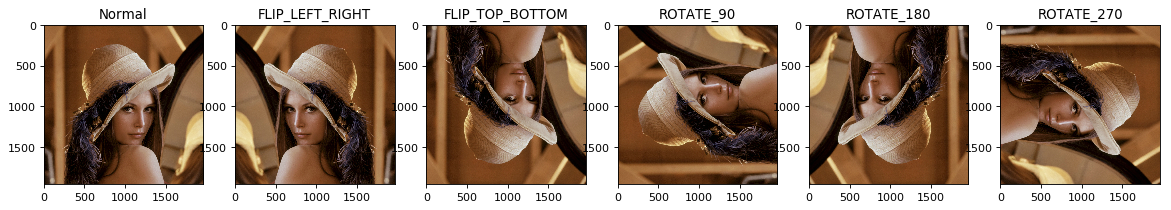

In [16]:
out1 = im.transpose(Image.FLIP_LEFT_RIGHT)
out2 = im.transpose(Image.FLIP_TOP_BOTTOM)
out3 = im.transpose(Image.ROTATE_90)
out4 = im.transpose(Image.ROTATE_180)
out5 = im.transpose(Image.ROTATE_270)

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,6,1)
plt.title('Normal')
plt.imshow(im)

plt.subplot(1,6,2)
plt.title('FLIP_LEFT_RIGHT')
plt.imshow(out1)

plt.subplot(1,6,3)
plt.title('FLIP_TOP_BOTTOM')
plt.imshow(out2)

plt.subplot(1,6,4)
plt.title('ROTATE_90')
plt.imshow(out3)

plt.subplot(1,6,5)
plt.title('ROTATE_180')
plt.imshow(out4)

plt.subplot(1,6,6)
plt.title('ROTATE_270')
plt.imshow(out5)

## Image Slicing (Array Slicing)

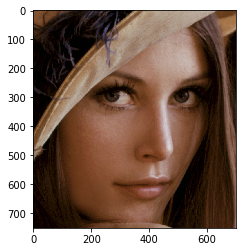

In [17]:
fr = faceRegion = (750,1500,750,1450)
imArray = np.asarray(im)
plt.imshow(imArray[fr[0]:fr[1],fr[2]:fr[3]])

## Image Filtering (Blur)

### Using Pillow Filter

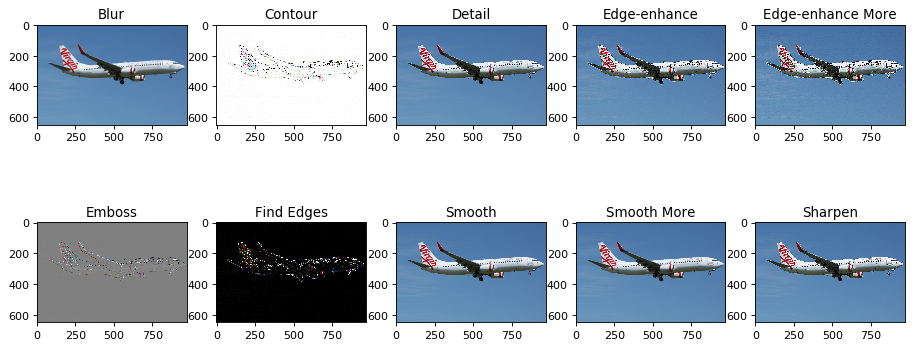

In [18]:
from PIL.ImageFilter import (
    BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
    EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)
i = 1

plane = Image.open("./images/plane.jpg")
plt.figure(figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')

for f in (
    BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
    EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN):
    
    plt.subplot(2,5,i)
    plt.title(f.name)
    plt.imshow(plane.filter(f))

    i+=1

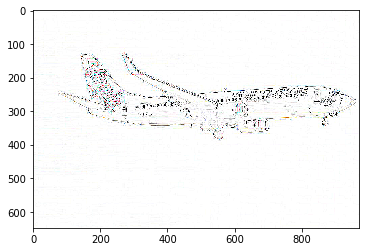

In [19]:
plt.imshow(plane.filter(CONTOUR))

for more information visit : https://hhsprings.bitbucket.io/docs/programming/examples/python/PIL/ImageFilter.html

In [22]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

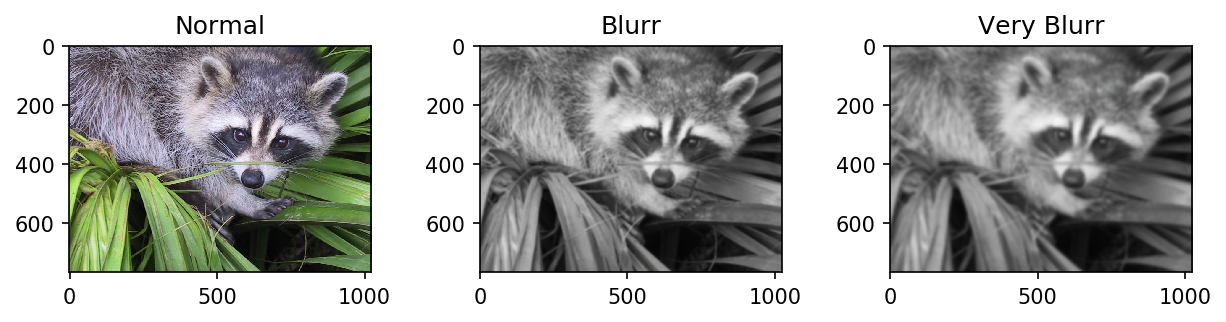

In [23]:
plt.figure(figsize=(10,2),dpi=150)

plt.subplot(1,3,1)
plt.title("Normal")
plt.imshow(face)

plt.subplot(1,3,2)
plt.title("Blurr")
plt.imshow(blurred_face)

plt.subplot(1,3,3)
plt.title("Very Blurr")
plt.imshow(very_blurred)

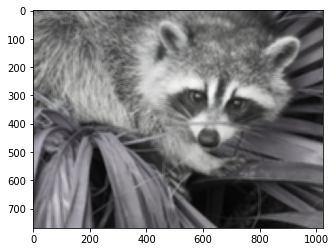

In [24]:
local_mean = ndimage.uniform_filter(face, size=11)
plt.imshow(local_mean)

### Feature Extraction

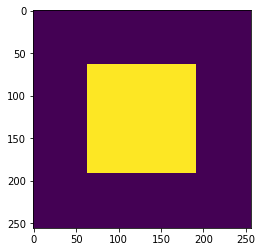

In [25]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
plt.imshow(im)

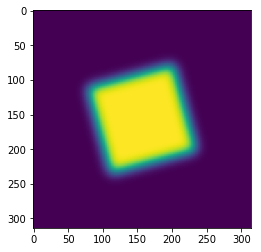

In [26]:
im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)
plt.imshow(im)

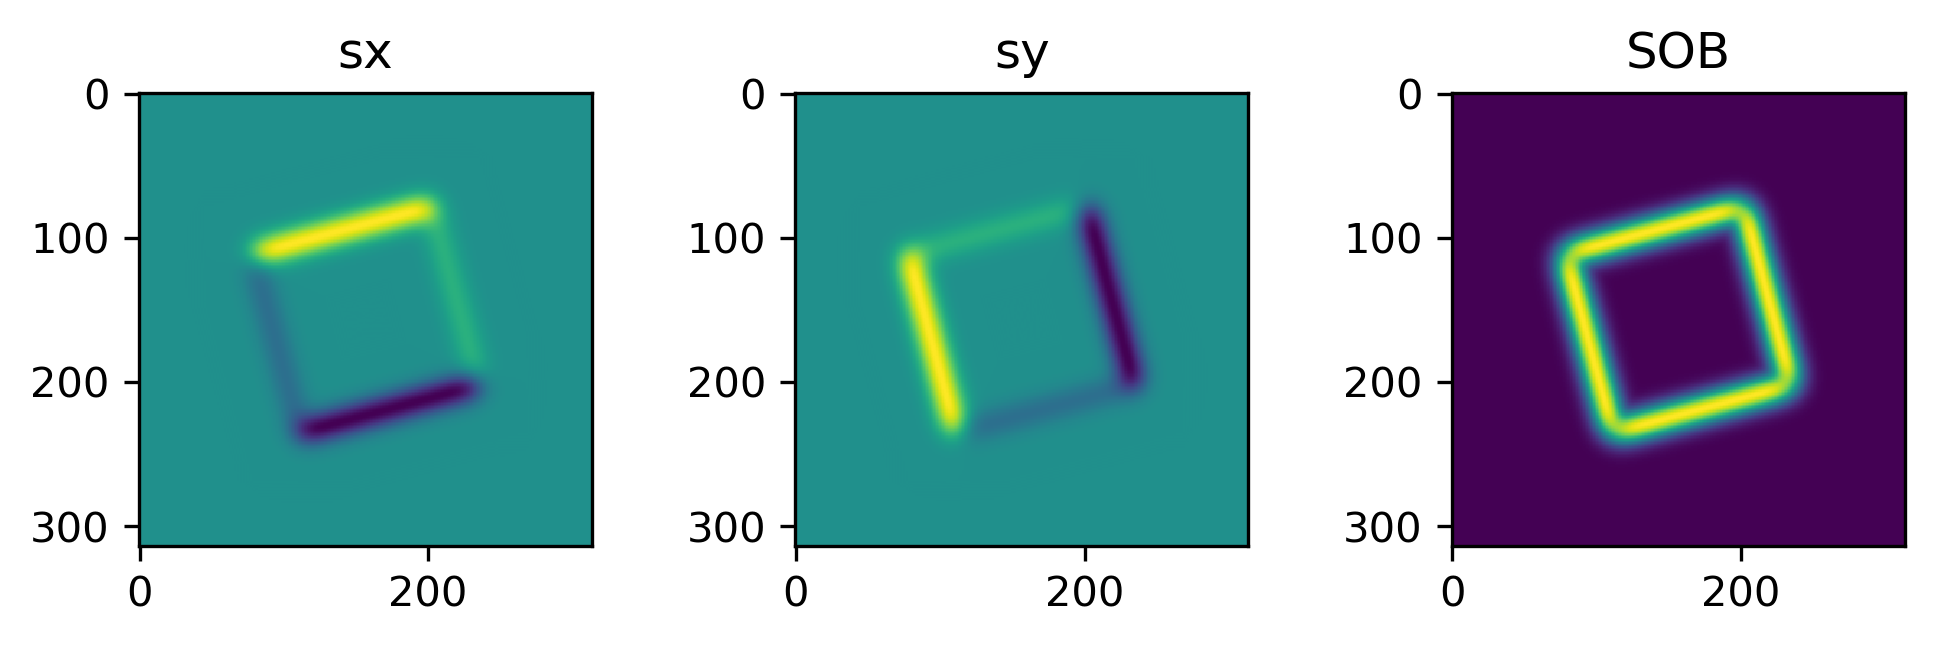

In [27]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(8,2),dpi=300)
plt.subplot(1,3,1)
plt.title("sx")
plt.imshow(sx)
plt.subplot(1,3,2)
plt.title("sy")
plt.imshow(sy)
plt.subplot(1,3,3)
plt.title("SOB")
plt.imshow(sob)

### Segmentation

In [28]:
n = 10
l = 256
im = np.zeros((l, l))
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

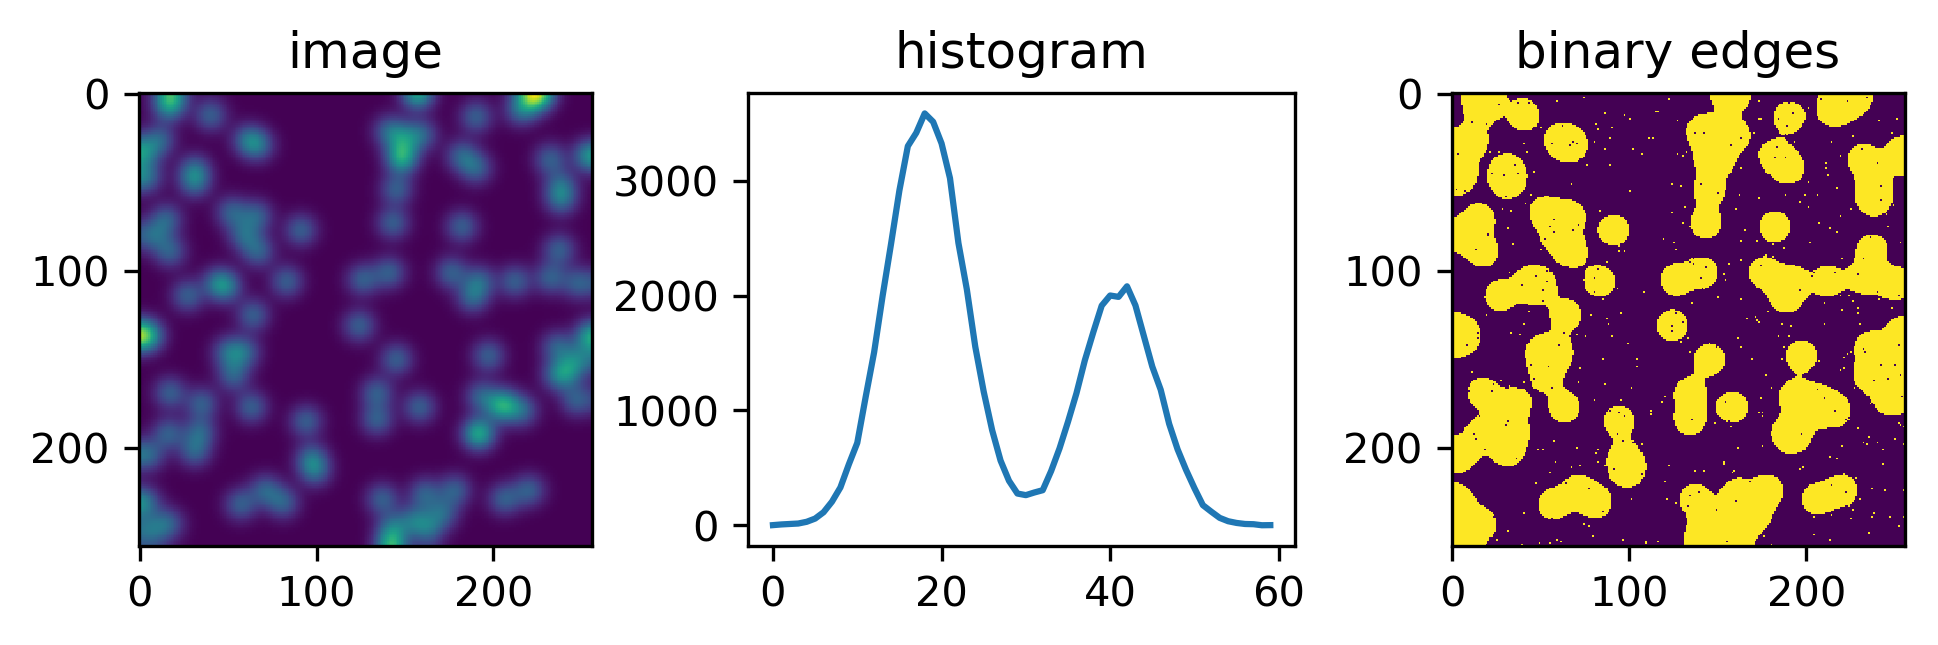

In [29]:
plt.figure(figsize=(8,2),dpi=300)

plt.subplot(1,3,1)
plt.title("image")
plt.imshow(im)

plt.subplot(1,3,2)
plt.title("histogram")
plt.plot(hist)

plt.subplot(1,3,3)
plt.title("binary edges")
plt.imshow(binary_img)

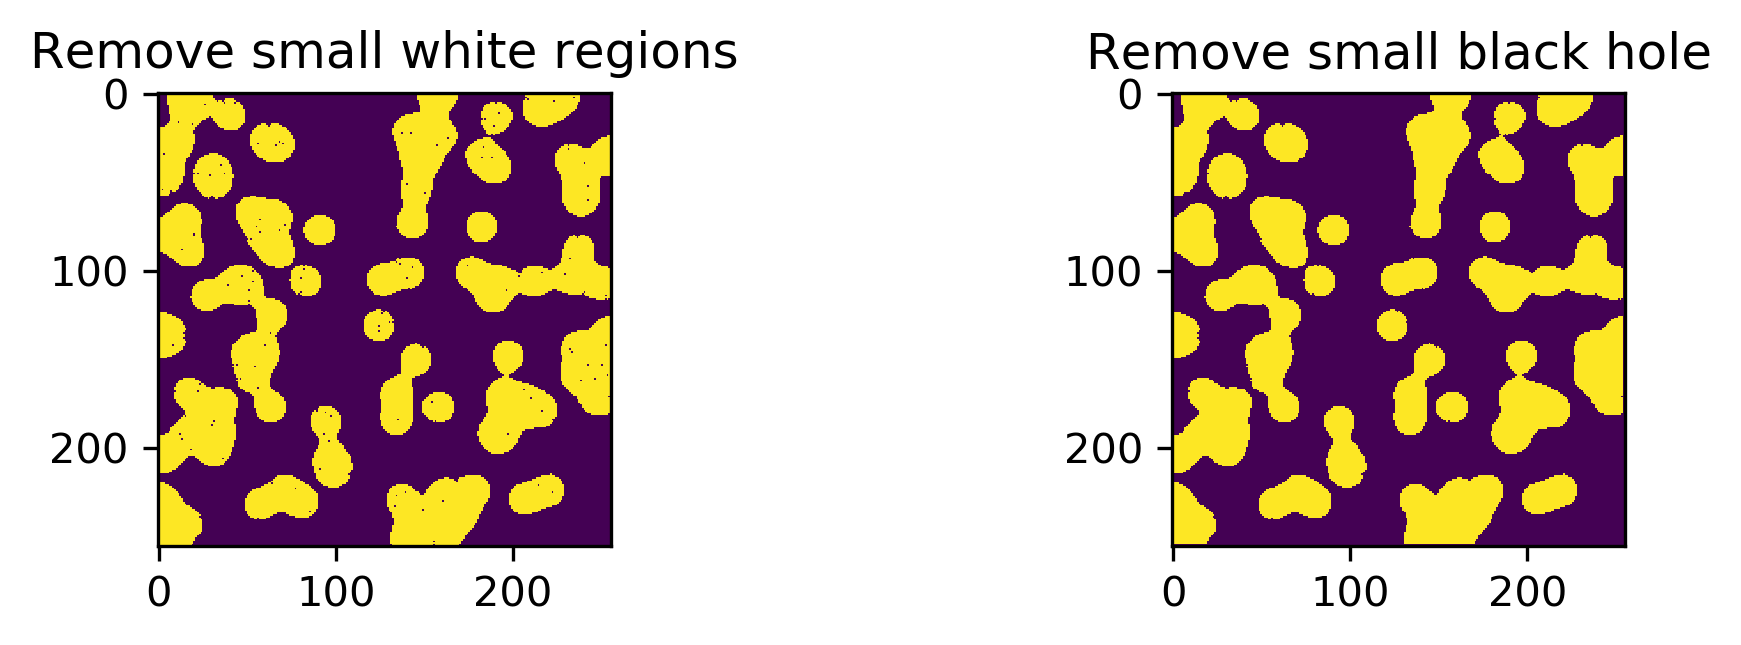

In [30]:
# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)


plt.figure(figsize=(8,2),dpi=300)

plt.subplot(1,2,1)
plt.title("Remove small white regions")
plt.imshow(open_img)

plt.subplot(1,2,2)
plt.title("Remove small black hole")
plt.imshow(close_img)